# Perceptron Algorithm: Part 1 

Here is a link to my source code: [Perceptron Algorithm](https://github.com/kennyerss/kennyerss.github.io/blob/main/posts/perceptron/perceptron.py)


## Implementation

In my implementation of the Perceptron Algorithm, I had to compute the equation:

$$\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + \mathbb{1}(\tilde{y_i}\langle{\tilde{w}^{(t)},\tilde{x_i}} \rangle < 0)\tilde{y_i}\tilde{x_i}$$

In my implementation, I created a method called `update` that takes in three arguments, the `X` feature matrix, an `index`, and the true label `y` vector. Ths method computes the dot product of the X feature matrix (indexed by the `ith` index) and the current weight vector. Then, I take its indicator condition if the true label y multiplied by the dot product is less than 0. Lastly, to finalize the weight vector update, I multiplied the indicator condition with the product of the true label y with the indexed feature matrix X. 

Thus, for each iteration of the Perceptron supposing accuracy has not reached 1, I will call the method `update` to update the initialized weight vector `w_`  by adding the result of `update` to the previous weight vector.


## Experimentation

### Linearly Separable Data

Here is an experiment using a linearly separable data demonstrating the convergence towards an accuracy of 1 with the Perceptron algorithm. First, we can randomize a linearly separable data and visualize the plot.

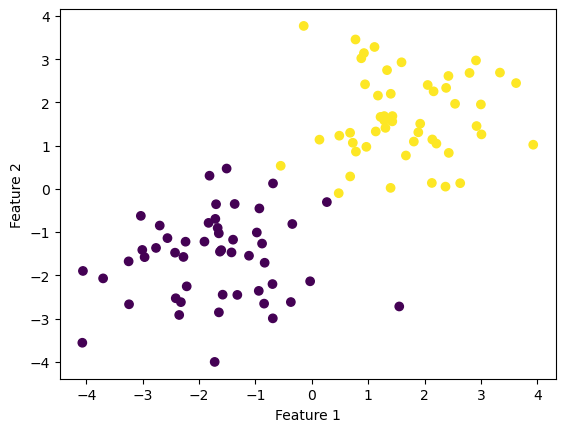

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from perceptron import Perceptron
from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Then, we can fit the Perceptron onto its data and plot its accuracy evolution up until the algorithm has met an accuracy of 1. 

In [2]:
np.random.seed(12345)

p = Perceptron()
p.fit(X, y, max_steps = 1000)

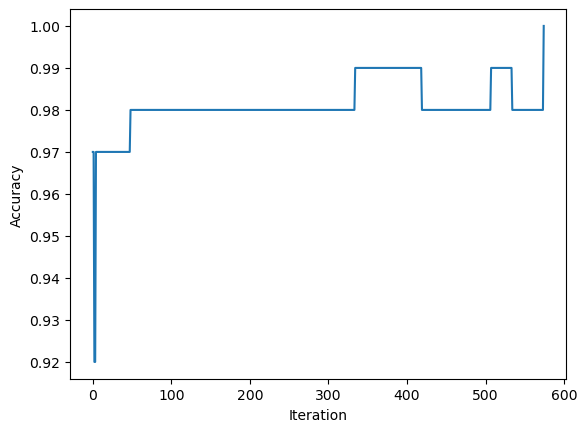

In [3]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

As shown above, the Perceptron has reached an accuracy of 1 just around ~650 iterations. Hence, we can plot the separating line and should discover that the line separates each point to its corresponding label.

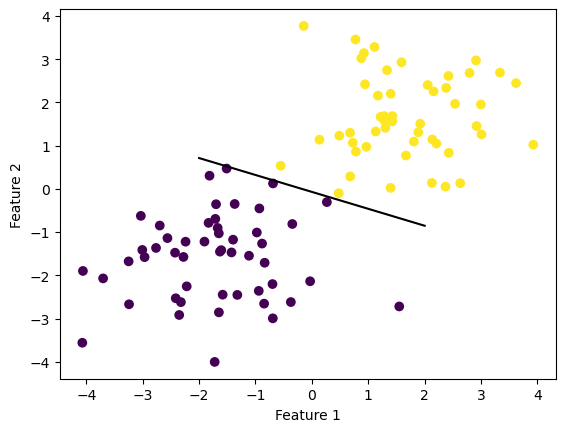

In [4]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Non-linearly Separable Data

For data that is non-linearly separable, we should discover that the Perceptron will not converge to perfect accuracy, but instead, the Perceptron will terminate until max iterations has reached. Below, we will produce and visualize data that is non-linearly separable.

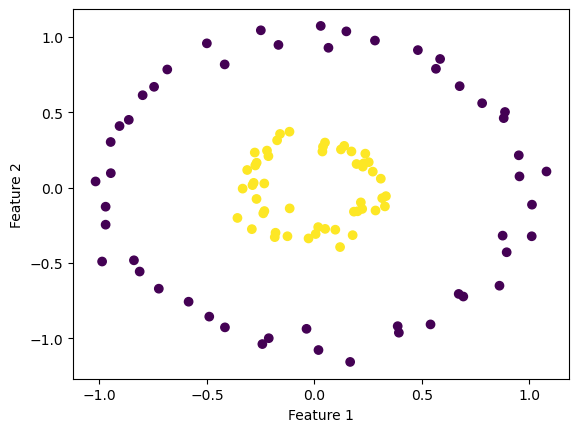

In [5]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples= 100, factor=0.3, noise=0.05, random_state=0)

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Then, similarly to the previous experiment, we can fit the Perceptron onto the data and plot the accuracy of its evolution.

In [6]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

In [7]:
# Printing the last 10 values of the Perceptron history
print(p.history[-10:])

[0.62, 0.62, 0.62, 0.51, 0.51, 0.5, 0.5, 0.54, 0.54, 0.54]


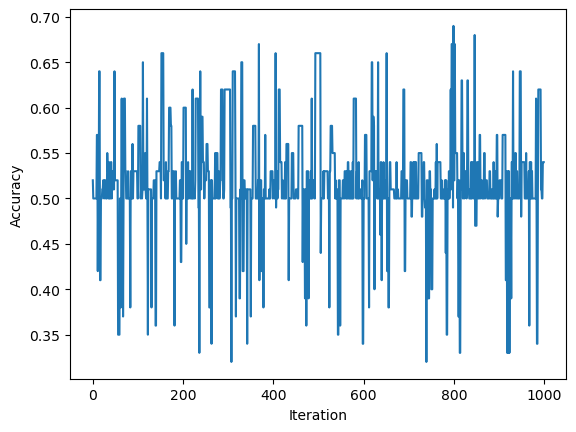

In [8]:
# Plotting the Perceptron's score history
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

As shown above, the Perceptron's accuracy history shows that it never converges to 1 and oscillates up until the max iterations were reached.

### The Perceptron in N-Features

Now, we can experiment on the Perceptron for a set of data with at least 5 features. 

In [9]:
p_features = 6

# Create data that is at least 5 features
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

# Fit our Perceptron onto the data 
p = Perceptron()
p.fit(X, y, max_steps = 1000)

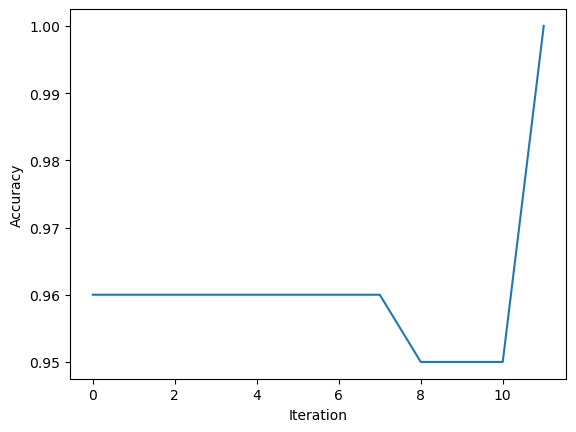

In [10]:
# Visualize our Perceptron's accuracy evolution

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In the evolution of the Perceptron's accuracy, we can see that the Perceptron never reaches an accuracy of 1, though it was pretty close. This visualization indicates that the data of n-features is not linearly separable.

## Runtime of a Singular Perceptron Update

Recalling the equation for a singular perceptron update: $$\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + \mathbb{1}(\tilde{y_i}\langle{\tilde{w}^{(t)},\tilde{x_i}} \rangle < 0)\tilde{y_i}\tilde{x_i}$$



Suppose for the dot product of weight vector $\tilde{w}^{(t)}$ with n + 1 elements and vector $\tilde{x_i}$ of the same size, at most we will have a runtime complexit of $O(n)$ dot product operations done. Then, for each of the dot product, we multiply that with the vector $\tilde{y_i}$ with assumptions to match the size of the two previous vectors, then that operation will also have a runtime complexity of $O(n)$. The indicator function should also take $O(n)$ as we are comparing a vector with length n elements with zero. 

Then, we compute the product of the vectors $\tilde{y_i}\tilde{x_i}$ which would have n + 1 elements. Similar to the first dot product, we should expect that the runtime of the product is $O(n)$. Lastly, we add what was a runtime of $O(n)$ operations with the product of vectors $\tilde{y_i}\tilde{x_i}$ — which took a runtime of $O(n)$. Assuming that the addition operation is constant, we have a final runtime complexity of $O(n)$ for a single iteration of a perceptron update.

The runtime complexity does not depend on the number of data points `n`, but the runtime will vary based on the number of features `p`. This is because as we increase the number of features, the number of multiplication operations increase exponentially as noted with the inner dot product within the indicator function.